In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

from quintic_generator import QuinticGenerator

from matplotlib import pyplot as plt

In [4]:
quintic_generator = QuinticGenerator()

In [18]:
coeffs = quintic_generator.compute_piecewise_coeffs_per_axes(np.array([2.0, 0.0, 1.0]), np.array([4.0, 3.0, 0.0]), 3.0, 7.0)

In [19]:
# Test if 1d polynomial works
t = np.linspace(3.0, 7.0)
x = np.poly1d(coeffs)
x_d = np.polyder(x, 1)
x_dd = np.polyder(x, 2)
x_ddd = np.polyder(x, 3)

Text(0.5, 1.0, 'Position')

Text(0.5, 1.0, 'Velocity')

Text(0.5, 1.0, 'Acc')

Text(0.5, 1.0, 'Jerk')

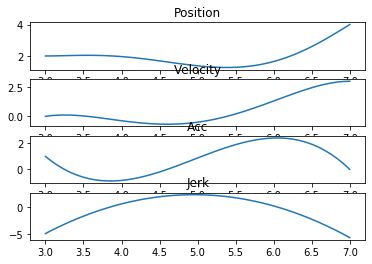

In [20]:
f, ax = plt.subplots(4, 1)
ax[0].plot(t, np.polyval(x, t-3.0))
ax[0].set_title('Position')

ax[1].plot(t, np.polyval(x_d, t-3.0))
ax[1].set_title('Velocity')

ax[2].plot(t, np.polyval(x_dd, t-3.0))
ax[2].set_title('Acc')

ax[3].plot(t, np.polyval(x_ddd, t-3.0))
ax[3].set_title('Jerk')
